<a href="https://colab.research.google.com/github/PapeAlioune1996/MyDataScienceNotebook/blob/master/Develop_prediction_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import requests

def download(url, filename):
    """Downloads a file from a URL using the requests library."""
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    with open(filename, "wb") as f:
        f.write(response.content)


In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

download(file_path, "used_cars.csv")
file_name="used_cars.csv"

In [ ]:
df = pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
from sklearn.linear_model import LinearRegression

Créer l'objet de régression linéaire :


In [ ]:
lm = LinearRegression()
lm

LinearRegression()

Comment « highway-mpg » peut-il nous aider à prédire le prix d'une voiture ?

Dans cet exemple, nous voulons voir comment la consommation d'essence peut nous aider à prédire le prix d'une voiture. À l'aide d'une régression linéaire simple, nous créerons une fonction linéaire avec « consommation de carburant » comme variable prédictive et « prix » comme variable réponse.

In [ ]:
X = df[['highway-mpg']]
Y = df['price']

Ajustez le modèle linéaire en utilisant highway-mpg :

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

Quelle est la valeur de l'ordonnée à l'origine (a) ?

In [ ]:
lm.intercept_

38423.3058581574

Quelle est la valeur de la pente (b) ?

In [ ]:
lm.coef_

array([-821.73337832])

Quel est le modèle linéaire final estimé que nous obtenons ?
Comme nous l'avons vu plus haut, nous devrions obtenir un modèle linéaire final avec la structure :

**Question** **n°** **1** **a)** :
Créez un objet de régression linéaire appelé « lm1 ».

In [ ]:
lm1 = LinearRegression()
lm1

LinearRegression()

**Question** **n°** **1** **b)** :
Entraîner le modèle en utilisant « taille du moteur » comme variable indépendante et « prix » comme variable dépendante ?

In [ ]:
X1 = df[['engine-size']]
Y1 = df['price']
lm1.fit(X1,Y1)

LinearRegression()

In [ ]:
Yhat1=lm1.predict(X1)
Yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

Question #1 c):
Find the slope and intercept of the model.

In [ ]:
lm1.intercept_

-7963.338906281042

In [ ]:
lm1.coef_

array([166.86001569])

Question #1 d) :
Quelle est l'équation de la droite prédite ? Vous pouvez utiliser x et yhat ou « taille du moteur » ou « prix ».

In [ ]:
# using X and Y
Yhat1=-7963.34 + 166.86*X1

Price=-7963.34 + 166.86*df['engine-size']

**Régression** **linéaire** **multiple**
Que faire si nous voulons prédire le prix d'une voiture en utilisant plus d'une variable ?

Si nous voulons utiliser plus de variables dans notre modèle pour prédire le prix d'une voiture, nous pouvons utiliser la régression linéaire multiple. La régression linéaire multiple est très similaire à la régression linéaire simple, mais cette méthode est utilisée pour expliquer la relation entre une variable de réponse continue (dépendante) et deux variables prédictives (indépendantes) ou plus. La plupart des modèles de régression du monde réel impliquent des prédicteurs multiples. Nous illustrerons la structure en utilisant quatre variables prédictives, mais ces résultats peuvent être généralisés à n'importe quel nombre entier :


In [ ]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [ ]:
lm2 = LinearRegression()
lm2.fit(Z, df['price'])

LinearRegression()

In [ ]:
lm2.intercept_

-15806.62462632922

In [ ]:
lm2.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Question #2 a) :
Créez et entraînez un modèle de régression linéaire multiple « lm2 » dans lequel la variable réponse est « prix » et les variables prédictives sont « pertes normalisées » et « consommation sur route ».

In [ ]:
lm3 =LinearRegression()
lm3

LinearRegression()

In [ ]:
z1 = df[['normalized-losses', 'highway-mpg']]
lm3.fit(z1, df['price'])

LinearRegression()

In [ ]:
lm3.coef_

array([   1.49789586, -820.45434016])

In [ ]:
lm3.intercept_

38201.31327245728

2. Évaluation des modèles à l'aide de la visualisation

In [ ]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

Graphique de régression
Lorsqu'il s'agit de régression linéaire simple, un excellent moyen de visualiser l'adéquation de notre modèle est d'utiliser des diagrammes de régression.

Ce graphique présente une combinaison de points de données dispersés (un nuage de points), ainsi que la ligne de régression linéaire ajustée qui passe par les données. Cela nous donnera une estimation raisonnable de la relation entre les deux variables, de la force de la corrélation, ainsi que de la direction (corrélation positive ou négative).

(0.0, 48170.544290450955)

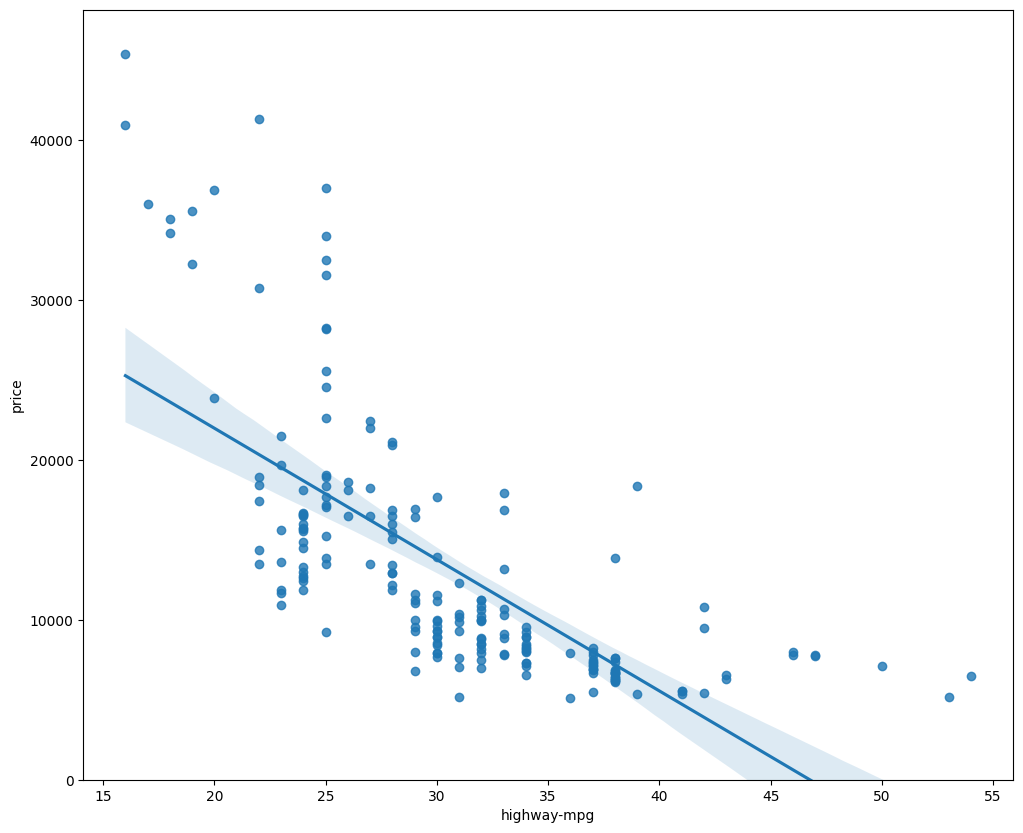

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Nous pouvons voir sur ce graphique que le prix est négativement corrélé à la consommation de carburant sur route puisque la pente de régression est négative.

Une chose à garder à l'esprit lorsque l'on examine un graphique de régression est de prêter attention à la dispersion des points de données autour de la ligne de régression. Cela vous donnera une bonne indication de la variance des données et vous permettra de déterminer si un modèle linéaire est le mieux adapté ou non. Si les données sont trop éloignées de la ligne, ce modèle linéaire n'est peut-être pas le meilleur modèle pour ces données.

Comparons ce graphique au graphique de régression de « peak-rpm ».

(0.0, 47414.1)

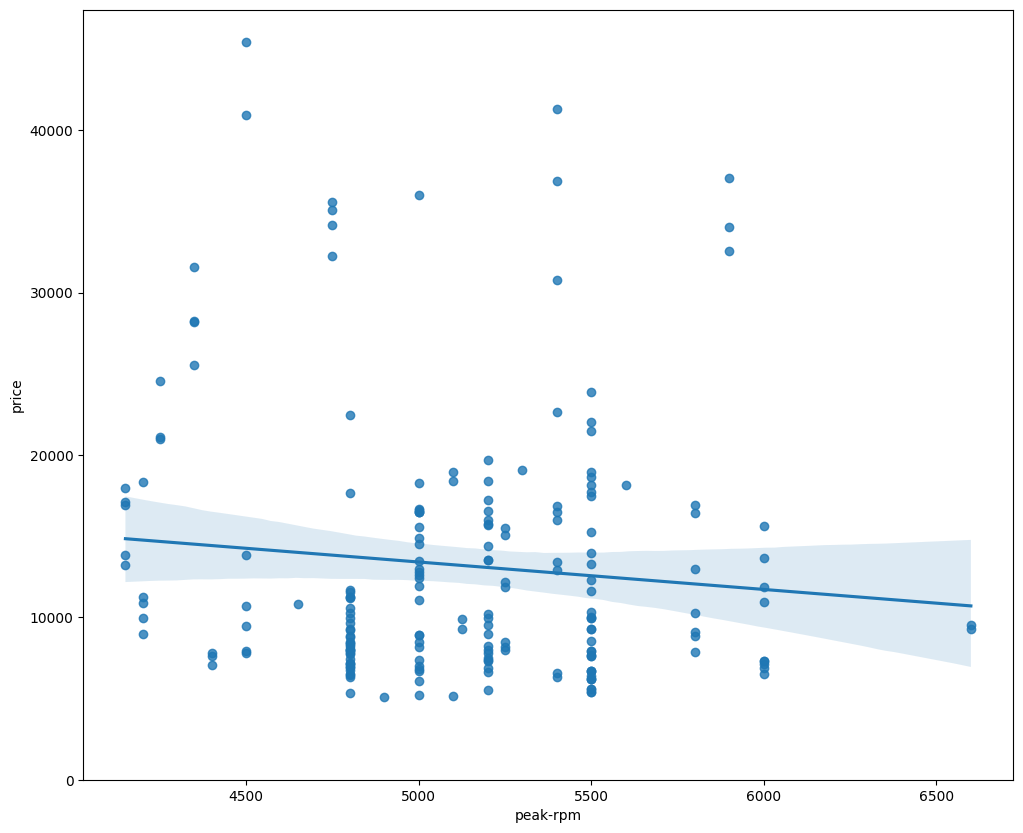

In [ ]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

En comparant le tracé de régression de « peak-rpm » et « highway-mpg », nous constatons que les points pour « highway-mpg » sont beaucoup plus proches de la ligne générée et, en moyenne, diminuent. Les points correspondant au « régime maximal » sont plus dispersés autour de la ligne prédite et il est beaucoup plus difficile de déterminer si les points diminuent ou augmentent au fur et à mesure que le « régime maximal » augmente.

Question #3:
Compte tenu des graphiques de régression ci-dessus, la corrélation entre le "highway-mpg" et le « prix » est-elle plus forte que celle entre le "peak-rpm" et le « kilométrage parcouru sur route » ? Utilisez la méthode « .corr() » pour vérifier votre réponse.

In [ ]:
#La variable « highway-mpg » a une corrélation plus forte avec « price »,
#elle est approximativement de -0.704692 par rapport à « peak-rpm » qui est
#approximativement de -0.101616.
# Vous pouvez le vérifier en utilisant la commande suivante :

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


from matplotlib import pyplot as plt
_df_0['peak-rpm'].plot(kind='hist', bins=20, title='peak-rpm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['highway-mpg'].plot(kind='hist', bins=20, title='highway-mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='peak-rpm', y='highway-mpg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='highway-mpg', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['peak-rpm'].plot(kind='line', figsize=(8, 4), title='peak-rpm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['highway-mpg'].plot(kind='line', figsize=(8, 4), title='highway-mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

Graphique des résidus
Un bon moyen de visualiser la variance des données est d'utiliser un graphique des résidus.

Qu'est-ce qu'un résidu ?

La différence entre la valeur observée (y) et la valeur prédite (Yhat) est appelée résidu (e). Lorsque nous examinons un graphique de régression, le résidu est la distance entre le point de données et la droite de régression ajustée.

Qu'est-ce qu'un graphique résiduel ?

Un graphique des résidus est un graphique qui montre les résidus sur l'axe vertical des y et la variable indépendante sur l'axe horizontal des x.

À quoi devons-nous prêter attention lorsque nous examinons un graphique des résidus ?

Nous examinons la dispersion des résidus :

- Si les points d'un graphique des résidus sont répartis de manière aléatoire autour de l'axe des x, un modèle linéaire est approprié pour les données.

Pourquoi ? Des résidus répartis de manière aléatoire signifient que la variance est constante, et donc que le modèle linéaire est bien adapté à ces données.

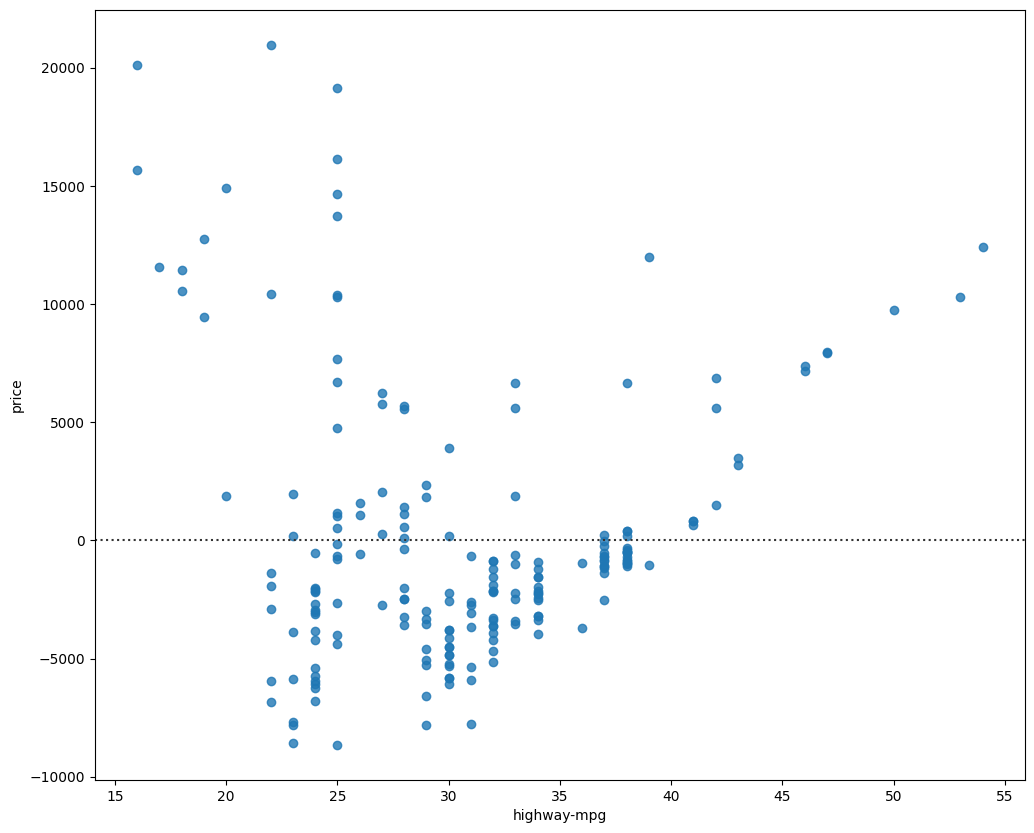

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

**Régression** **linéaire** **multiple**
Comment visualiser un modèle de régression linéaire multiple ? C'est un peu plus compliqué parce qu'on ne peut pas le visualiser avec un graphique de régression ou de résidus.

L'une des façons d'examiner l'adéquation du modèle est d'étudier le graphique de distribution. Nous pouvons examiner la distribution des valeurs ajustées qui résultent du modèle et la comparer à la distribution des valeurs réelles.

Commençons par faire une prédiction :

In [ ]:
Y_hat = lm.predict(Z)

<ipython-input-50-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-50-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

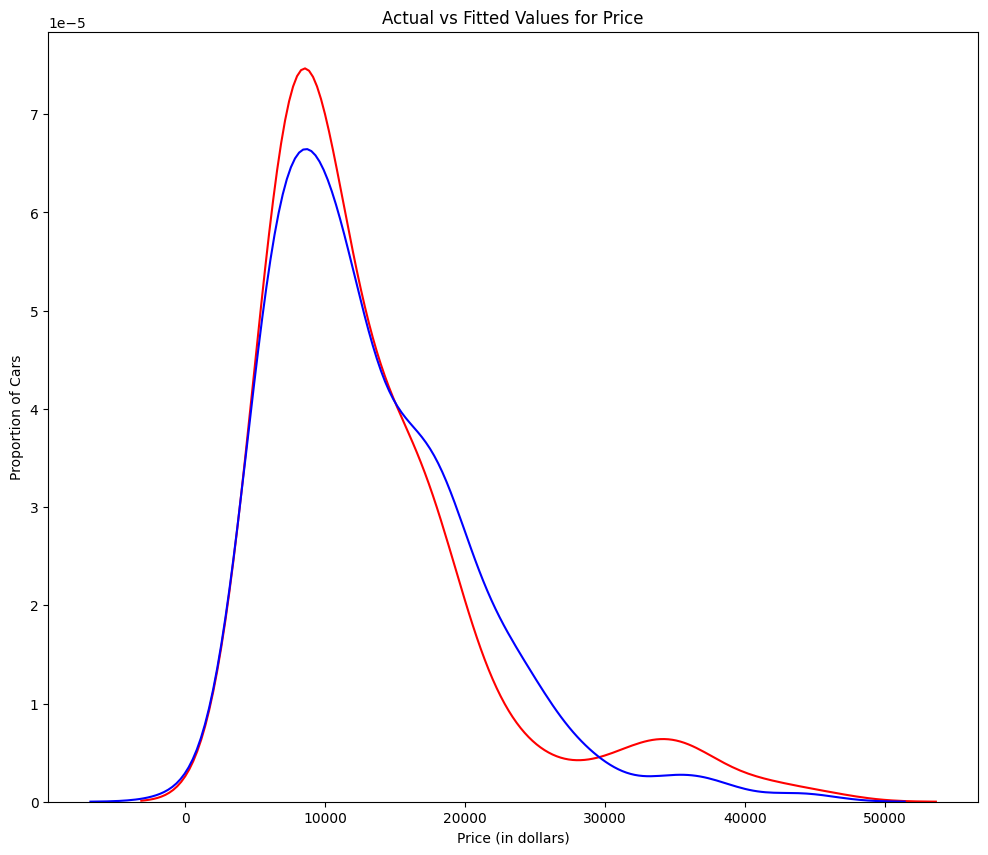

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

3.**Régression** **polynomiale** et  **pipelines**
La régression polynomiale est un cas particulier du modèle de régression linéaire général ou des modèles de régression linéaire multiple.

Nous obtenons des relations non linéaires en élevant au carré ou en fixant les termes d'ordre supérieur des variables prédictives.

Il existe différents ordres de régression polynomiale :

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [ ]:
X0 = df['highway-mpg']
Y0 = df['price']

Ajustons le polynôme à l'aide de la fonction polyfit, puis utilisons la fonction poly1d pour afficher la fonction polynomiale.

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(X0, Y0, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Traçons la fonction :

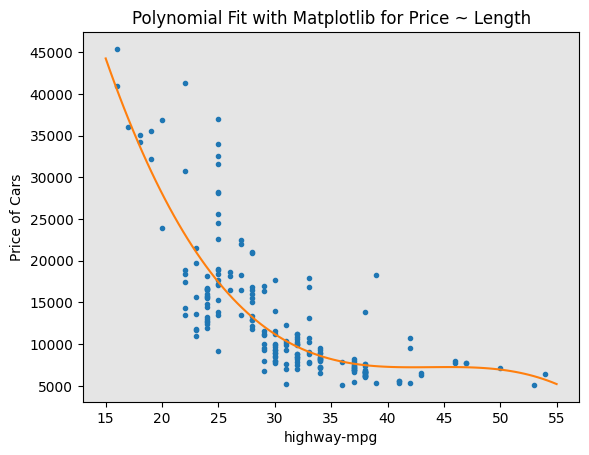

In [ ]:
PlotPolly(p, X0, Y0, 'highway-mpg')

In [ ]:
np.polyfit(X0, Y0, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Le tracé montre déjà que ce modèle polynomial est plus performant que le modèle linéaire. Cela s'explique par le fait que la fonction polynomiale générée « touche » davantage de points de données.

Question n°4 :
Créez un modèle polynomial d'ordre 11 avec les variables x et y ci-dessus.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


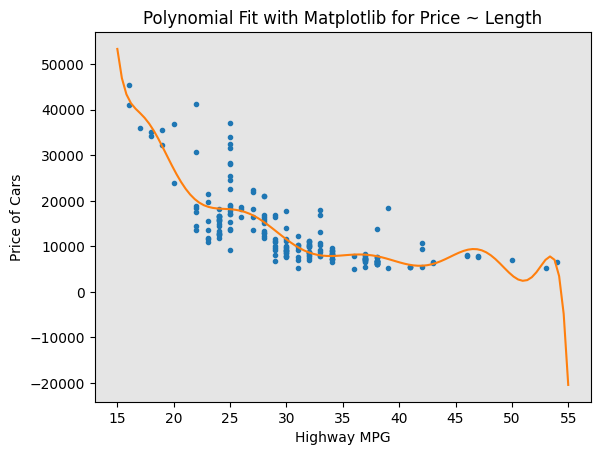

In [ ]:
f1 = np.polyfit(X0, Y0, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,X0,Y0, 'Highway MPG')

L'expression analytique d'une fonction polynomiale multivariée se complique. Par exemple, l'expression d'un polynôme du second ordre (degré=2) à deux variables est donnée par :

Nous pouvons effectuer une transformation polynomiale sur plusieurs caractéristiques. Tout d'abord, nous importons le module :

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
z_pr = pr.fit_transform(Z)

In [ ]:
Z.shape

(201, 4)

In [ ]:
z_pr.shape

(201, 15)

Pipeline
Les pipelines de données simplifient les étapes du traitement des données. Nous utilisons le module Pipeline pour créer un pipeline. Nous utilisons également StandardScaler comme étape de notre pipeline.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [ ]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Tout d'abord, nous convertissons le type de données Z en type float afin d'éviter les avertissements de conversion qui peuvent apparaître lorsque StandardScaler prend des entrées de type float.

Ensuite, nous pouvons normaliser les données, effectuer une transformation et ajuster le modèle simultanément.

In [ ]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

De même, nous pouvons normaliser les données, effectuer une transformation et produire une prédiction simultanément.

In [ ]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Question n°5 :
Créez un pipeline qui normalise les données, puis produisez une prédiction à l'aide d'un modèle de régression linéaire utilisant les caractéristiques Z et la cible y.

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

4. Mesures pour l'évaluation en échantillon
Lorsque nous évaluons nos modèles, nous voulons non seulement visualiser les résultats, mais aussi disposer d'une mesure quantitative pour déterminer le degré de précision du modèle.

Deux mesures très importantes sont souvent utilisées en statistique pour déterminer la précision d'un modèle :

R^2 / R-carré
Erreur quadratique moyenne (EQM)
R au carré

Le R au carré, également connu sous le nom de coefficient de détermination, est une mesure qui indique à quel point les données sont proches de la ligne de régression ajustée.

La valeur du R au carré est le pourcentage de variation de la variable réponse (y) qui est expliqué par un modèle linéaire.

Erreur quadratique moyenne (EQM)

L'erreur quadratique moyenne mesure la moyenne des carrés des erreurs. C'est-à-dire la différence entre la valeur réelle (y) et la valeur estimée (ŷ).

Modèle 1 : Régression linéaire simple
Calculons le R^2 :

In [ ]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('Le R-square est de: ', lm.score(X, Y))

Le R-square est de:  0.4965911884339176


Nous pouvons dire que ~49,659% de la variation du prix est expliquée par ce modèle linéaire simple « horsepower_fit ».

**Calculons** **le** **MSE** :
Nous pouvons prédire la sortie, c'est-à-dire « yhat », à l'aide de la méthode de prédiction, où X est la variable d'entrée :

In [ ]:
Yhat=lm.predict(X)
print('La sortie des quatre premières valeurs prédites est la suivante : ', Yhat[0:4])

La sortie des quatre premières valeurs prédites est la suivante :  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Importons la fonction mean_squared_error du module metrics :

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

calculons le R^2:

In [ ]:
# fit the model
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Calculons le MSE

In [ ]:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


Model 3: Polynomial Fit

Calculons le R^2.
Importons la fonction r2_score du module metrics car nous utilisons une fonction différente.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


**MSE**

In [ ]:
mean_squared_error(df['price'], p(x))

20474146.426361218

5. **Prévision** **et** **prise** **de** **décision**

Prevision :
Dans la section précédente, nous avons entraîné le modèle à l'aide de la méthode fit. Nous allons maintenant utiliser la méthode predict pour produire une prédiction. Importons pyplot pour le tracé ; nous utiliserons également quelques fonctions de numpy.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [ ]:
lm.fit(X, Y)
lm

LinearRegression()

In [ ]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

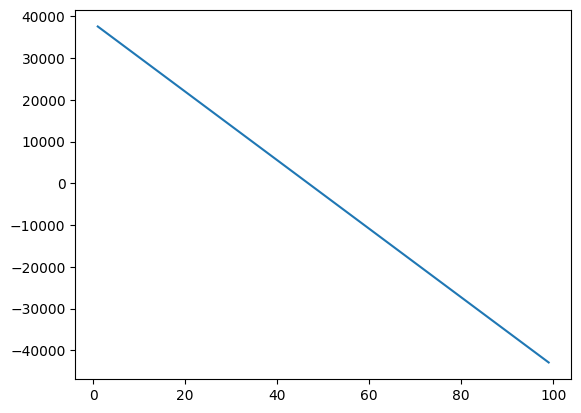

In [ ]:
plt.plot(new_input, yhat)
plt.show()